# Null Models

In this workbook, we will look at a network of US airports and determine if its characteristics are significantly different from random networks.

In [2]:
# Importing the required libraries

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [3]:
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

In [4]:
# Function Defintions

# Function to plot a degree distribution graph (P(k) vs k graph)
def plot_degree_dist(G):
    
    degrees = [G.degree(n) for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [5]:
# Read in the netflix actor-director network

#path to the file
# Path to your GEXF file
from networkx import is_connected

gexf_file_path = "./network_100%.gexf"

# Read the GEXF file and create a graph object
netflix_graph = nx.read_gexf(gexf_file_path)

print("Total Number of Nodes: ", netflix_graph.number_of_nodes())
print("Total Number of Edges: ", netflix_graph.number_of_edges())
print("Is graph connected? ", is_connected(netflix_graph))
#can disconnected components exist?

degrees = [netflix_graph.degree(node) for node in netflix_graph]
kmin = min(degrees)
kmax = max(degrees)
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)
print("Average degree (alternate calculation)", np.mean(degrees)) #calculating the avg degree using graph calculation



Total Number of Nodes:  35133
Total Number of Edges:  49577
Is graph connected?  False

Minimum degree:  1
Maximum degree:  50
Average degree (alternate calculation) 2.8222468903879543


In [6]:
#Finding node with highest degree(s)
#max degree --> kmax
#Min degree --> kmin
print("Degree sequence --> ")
print([netflix_graph.degree(node) for node in netflix_graph])

#reverse sort the list
print(sorted(degrees, reverse=True))
print("Max degree: ", kmax)

#getting the movie with highest degree
highest_movie_degree = -1
highest_movie_degree_nodes = []
for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
    if (data.get('type') == "movie"):
        if (netflix_graph.degree(node)) >= highest_movie_degree:
            highest_movie_degree = netflix_graph.degree(node)
print("Highest Degree in Movie --> ", highest_movie_degree)

for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
    if (data.get('type') == "movie"):
        if (netflix_graph.degree(node)) == highest_movie_degree:
            print("*")
            highest_movie_degree_nodes.append(node)

for movie in highest_movie_degree_nodes:
    print("Movie with highest degree: ", movie)

#finding the movie with highest degree
#finding degree of a node: print(netflix_graph.degree("Robert Cullen"))
for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
    if (data.get('type') == "movie"):
        if (netflix_graph.degree(node)) == kmax:
            print("Node With highest degree: {0}\t\t: {1}".format(node, data))  


Degree sequence --> 
[12, 1, 1, 7, 3, 12, 3, 2, 11, 4, 8, 3, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 12, 1, 4, 7, 5, 5, 3, 3, 1, 2, 1, 10, 1, 12, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 11, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 11, 1, 5, 5, 2, 1, 1, 1, 3, 1, 1, 1, 7, 1, 2, 1, 1, 1, 13, 2, 6, 5, 5, 5, 5, 5, 1, 5, 1, 1, 9, 2, 7, 3, 3, 6, 5, 5, 12, 4, 20, 10, 13, 6, 9, 12, 10, 15, 7, 3, 1, 11, 3, 3, 4, 8, 2, 1, 1, 1, 1, 1, 1, 11, 6, 3, 11, 11, 12, 4, 6, 1, 2, 5, 2, 10, 2, 4, 2, 5, 3, 2, 9, 2, 3, 1, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 1, 1, 2, 4, 3, 2, 1, 2, 2, 1, 3, 10, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 11, 11, 2, 1, 3, 2, 1, 2, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 11, 1, 12, 2, 1, 2, 2, 5, 1, 1, 1, 1, 9, 2, 1, 3, 2, 5, 2, 1, 5, 11, 1, 10, 13, 7, 13, 10, 2, 2, 11, 4, 2, 12, 5, 8, 4, 6, 5, 2, 7, 3, 6, 3, 7, 11, 7, 7, 8, 2, 7, 8, 7, 5, 3, 4, 1, 9, 5, 5, 3, 11, 2, 3, 2, 11, 1, 1, 11, 5, 9, 9, 6, 7, 3, 2, 3, 2, 2, 3, 12, 2, 3, 1, 1, 4, 3, 3, 2, 14, 2, 1, 1, 3, 2, 2, 22, 1, 1, 1, 5, 1, 1, 1, 5, 1, 2, 1, 2, 5, 1

In [13]:
#getting actor with higest degree
highest_cast_degree = -1
highest_cast_degree_nodes = []
for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
    if (data.get('type') == "cast"):
        if (netflix_graph.degree(node)) >= highest_cast_degree:
            highest_cast_degree = netflix_graph.degree(node)
print("Highest Degree in Case --> ", highest_cast_degree)

for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
    if (data.get('type') == "cast"):
        if (netflix_graph.degree(node)) == highest_cast_degree:
            print("*")
            highest_cast_degree_nodes.append(node)

for cast in highest_cast_degree_nodes:
    print("Cast with highest degree: ", cast)


Highest Degree in Case -->  42
*
Cast with highest degree:  Anupam Kher


In [8]:
#===============================
print("=================================")
#getting director with higest degree
highest_dir_degree = -1
highest_dir_degree_nodes = []
for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
    if (data.get('type') == "director"):
        if (netflix_graph.degree(node)) >= highest_dir_degree:
            highest_dir_degree = netflix_graph.degree(node)
print("Highest Degree in Case --> ", highest_dir_degree)

for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
    if (data.get('type') == "director"):
        if (netflix_graph.degree(node)) == highest_dir_degree:
            print("*")
            highest_dir_degree_nodes.append(node)

for dirs in highest_dir_degree_nodes:
    print("Director with highest degree: ", dirs)


Highest Degree in Case -->  21
*
Director with highest degree:  Jan Suter


***

### Getting more information about the above nodes from the JSON file

In [9]:
#Read the JSON File
#https://www.geeksforgeeks.org/read-json-file-using-python/
#https://realpython.com/python-string-contains-substring/
import json
json_filename = "./clean_data.json"
# Open the JSON file
with open(json_filename) as json_file:
    # Load the JSON data
    json_data = json.load(json_file)

#json data contains everything from the json file


#getting movies directed by highest degree directors
for dirs in highest_dir_degree_nodes:
    print("Director: ", dirs)
    for row in json_data:
        if dirs in row['director']:
            print(row['title'])



Director:  Jan Suter
Coco y Raulito: Carrusel de ternura
Luciano Mellera: Infantiloide
Jani Dueñas: Grandes fracasos de ayer y hoy
Fernando Sanjiao: Hombre
Carlos Ballarta: Furia Ñera
Todo lo que sería Lucas Lauriente
Sofía Niño de Rivera: Selección Natural
Malena Pichot: Estupidez compleja
Natalia Valdebenito: El especial
Sebastián Marcelo Wainraich
Ricardo Quevedo: Hay gente así
Arango y Sanint: Ríase el show
Mea Culpa
El Especial de Alex Fernández, el Especial
Alan Saldaña: Mi vida de pobre
Simplemente Manu NNa
Daniel Sosa: Sosafado
Ricardo O'Farrill: Abrazo navideño
Carlos Ballarta: El amor es de putos
Sofía Niño de Rivera: Exposed
Ricardo O'Farrill Abrazo Genial


In [10]:
#getting movies featuring highest degree cast

for cast in highest_cast_degree_nodes:
    print("Cast: ", cast)
    for row in json_data:
        if cast in row['cast']:
            print(row['title'])
    print("===============")

Cast:  Anupam Kher
C Kkompany
Kyaa Kool Hai Hum
Kyaa Super Kool Hain Hum
Kyo Kii... Main Jhuth Nahin Bolta
Silver Linings Playbook
Dil
Chashme Baddoor
Special 26
Prem Ratan Dhan Payo
Vivah
One Day: Justice Delivered
Gori Tere Pyaar Mein
Gumrah
Kuch Kuch Hota Hai
Hum Aapke Hain Koun
Game
Zokkomon
Wake Up Sid
Naam Shabana
Toilet: Ek Prem Katha
Rang De Basanti
Aiyaary
Paheli
Judwaa 2
Oh Darling Yeh Hai India
Chaahat
A Family Man
A Wednesday
Chashme Buddoor
Hamara Dil Aapke Paas Hai
Haseena Maan Jaayegi
Jaan-E-Mann: Let's Fall in Love... Again
Judwaa
Khalnayak
Khosla Ka Ghosla
Kya Kehna
Mahabharat
Super Nani
Tahaan
The Shaukeens
Y.M.I.: Yeh Mera India
Yamla Pagla Deewana 2


In [11]:
#getting cast and directores of highest degree movies
print("===============")
for movie in highest_movie_degree_nodes:
    print("Movie: ", movie)
    for row in json_data:
        if movie in row['title']:
            print("Director(s): ",row['director'])
            print("Cast(s): ",row['cast'])

Movie:  Movie 43
Director(s):  Peter Farrelly, Will Graham, Steve Carr, Griffin Dunne, Steve Brill, James Duffy, Jonathan van Tulleken, Elizabeth Banks, Patrik Forsberg, Brett Ratner, Rusty Cundieff, James Gunn
Cast(s):  Greg Kinnear, Dennis Quaid, Common, Seth MacFarlane, Will Sasso, Hugh Jackman, Kate Winslet, Liev Schreiber, Naomi Watts, Anna Faris, Chris Pratt, J.B. Smoove, Kieran Culkin, Emma Stone, Cathy Cliften, Kristen Bell, Leslie Bibb, Bobby Cannavale, John Hodgman, Justin Long, Jason Sudeikis, Uma Thurman, Phil Crowley, Kate Bosworth, Richard Gere, Jack McBrayer, Aasif Mandvi, Christopher Mintz-Plasse, Chloë Grace Moretz, Matt Walsh, Patrick Warburton, Gerard Butler, Johnny Knoxville, Seann William Scott, Halle Berry, Stephen Merchant, Terrence Howard, Elizabeth Banks, Josh Duhamel


##### Most Common TV Rating

all TV rating:  ['PG', 'TV-MA', 'PG-13', 'TV-MA', 'TV-PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-14', 'TV-PG', 'PG-13', 'PG-13', 'PG-13', 'TV-14', 'TV-MA', 'TV-MA', 'PG-13', 'PG', 'PG', 'PG', 'PG-13', 'R', 'R', 'TV-14', 'TV-14', 'TV-PG', 'TV-PG', 'TV-14', 'TV-PG', 'TV-PG', 'TV-PG', 'TV-14', 'TV-PG', 'TV-PG', 'TV-PG', 'TV-PG', 'TV-14', 'TV-Y', 'TV-MA', 'TV-G', 'TV-Y7', 'TV-14', 'TV-14', 'TV-Y7', 'R', 'TV-MA', 'TV-MA', 'PG-13', 'TV-MA', 'TV-MA', 'PG', 'TV-MA', 'TV-MA', 'TV-14', 'G', 'PG-13', 'TV-PG', 'TV-14', 'PG', 'TV-PG', 'TV-14', 'TV-MA', 'R', 'TV-14', 'PG', 'PG-13', 'PG-13', 'TV-Y', 'R', 'R', 'PG-13', 'R', 'R', 'PG', 'PG-13', 'R', 'TV-MA', 'R', 'PG-13', 'PG-13', 'R', 'R', 'R', 'R', 'R', 'TV-14', 'TV-MA', 'PG', 'PG', 'TV-14', 'PG-13', 'TV-MA', 'PG-13', 'PG-13', 'R', 'PG-13', 'R', 'PG', 'PG', 'PG-13', 'R', 'PG-13', 'PG-13', 'PG-13', 'R', 'R', 'PG-13', 'TV-14', 'R', 'PG-13', 'PG-13', 'PG-13', 'R', 'TV-MA', 'TV-14', 'R', 'TV-14', 'TV-14', 'TV-14', 'TV-14', 'TV-14', 'TV-14', 'TV-MA', 'TV-MA', 'TV

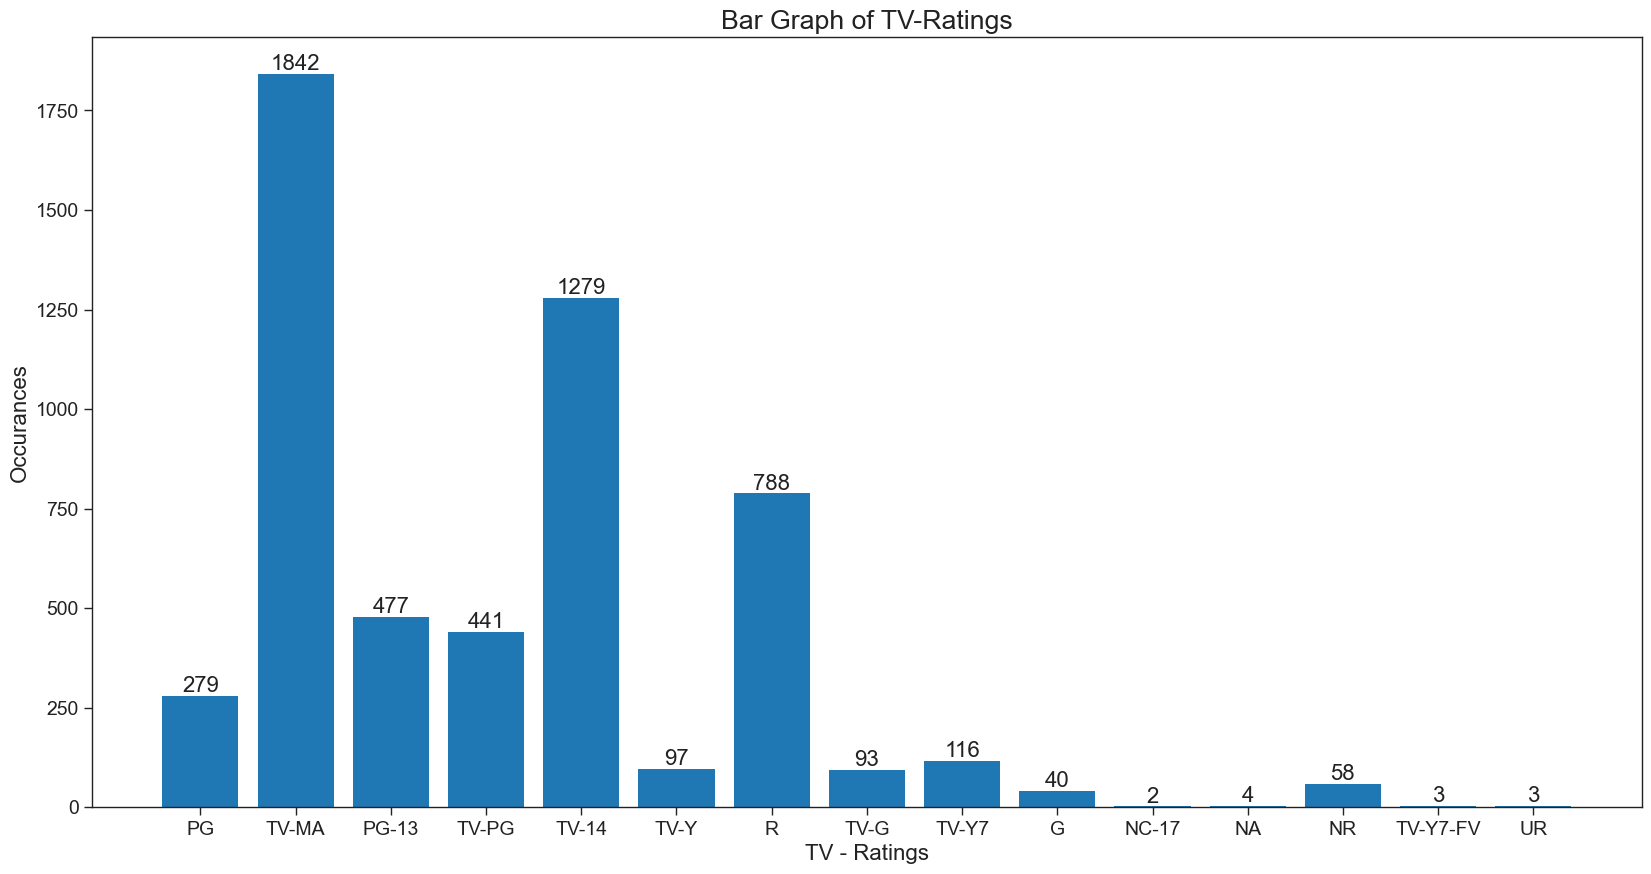

In [12]:
#or graph of TV rating?

#list of all TV-Rating
all_tv_rating = []
for row in json_data:
    #each row means each record
    #each record has 'rating' field
    #append that firld to list of all tv_rating
    all_tv_rating.append(row['rating'])
print("all TV rating: ", all_tv_rating)

#unique tv rating
unique_tv_rating = []
for rating in all_tv_rating:
    if rating in unique_tv_rating:
        continue
    else:
        unique_tv_rating.append(rating)
print("unique tv rating: ", unique_tv_rating)

#calculate occurances of each TV rating in a dict
dict_tv_rating = {}
for unq_rating in unique_tv_rating:
    occ = 0
    for all_rating in all_tv_rating:
        if unq_rating == all_rating:
            occ = occ + 1
    #all_tv_rating list fully transversed
    #occ stores its occurances
    #add (unq_rating, occ) into dict
    dict_tv_rating[unq_rating] = occ

print("dict pairs: ", dict_tv_rating)
#(rating: occurances) pairs are stored in dict_tv_rating

#https://myrestraining.com/blog/programming/how-to-plot-a-dictionary-in-python/#:~:text=To%20plot%20a%20dictionary%20using,color%2C%20width%2C%20and%20labels.


#make a bar graph out of it
keys = list(dict_tv_rating.keys())
values = list(dict_tv_rating.values())
# Creating the bar graph

plt.figure(figsize=(20, 10))  # Adjust figure size as needed
#plt.bar(keys, values)

bars = plt.bar(keys, values)

# Adding labels and title
plt.xlabel('TV - Ratings')
plt.ylabel('Occurances')
plt.title('Bar Graph of TV-Ratings')

# Adding labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Display the graph
plt.show()

##### Duration?

In [25]:
#do the same for the duration of each movies?
#scatter plot?
    #dots show the duration
    #y axis --> duration
    #x axis --> release years?

#list of all durations
all_duration = []
all_year = []

dict_rating_year_duration = {}
x = 0
for row in json_data:
    #each row means each record
    #each record has 'rating' field
    #append that firld to list of all tv_rating
    #duration in json "43 min", removed the last "_min", replaced with "" and then stored
    all_duration.append(row['duration'].replace(" min", ""))
    all_year.append(row['release_year'])
    dict_rating_year_duration[x] = [row['rating'],row['release_year'],row['duration'].replace(" min", "")]
    x = x + 1


print("all_duration: ", all_duration)
print("all_year: ", all_year)
print("all_all_tv_rating: ", all_tv_rating)

print("dict_rating_year_duration: ", dict_rating_year_duration)


#unique years
unique_years = []
for year in all_year:
    if year in unique_years:
        continue
    else:
        unique_years.append(year)
print("unique years: ",unique_years)
print("# unique years: ",len(unique_years))


print("unique ratings: ",unique_tv_rating)
print("# unique rating: ",len(unique_tv_rating))






all_duration:  ['91', '125', '104', '127', '91', '94', '161', '61', '166', '147', '103', '97', '106', '111', '110', '105', '96', '124', '116', '98', '91', '115', '122', '99', '99', '88', '100', '102', '93', '96', '95', '85', '97', '95', '83', '103', '113', '13', '182', '106', '48', '145', '145', '93', '106', '147', '87', '96', '95', '91', '90', '97', '117', '128', '90', '119', '110', '143', '119', '114', '106', '99', '118', '115', '95', '115', '108', '63', '117', '121', '142', '113', '154', '95', '108', '120', '100', '82', '124', '114', '104', '94', '94', '93', '97', '109', '88', '101', '105', '102', '101', '103', '106', '118', '86', '121', '229', '76', '95', '98', '89', '120', '110', '83', '121', '105', '94', '156', '112', '95', '107', '114', '129', '97', '125', '107', '127', '128', '92', '135', '124', '136', '165', '124', '136', '150', '112', '119', '133', '142', '93', '113', '124', '116', '106', '145', '93', '95', '108', '90', '92', '122', '122', '122', '122', '84', '96', '115', '11

***

#### Old Vs New Movies

In [26]:
#graph for number of movies in each year
#make a dict : {year, # of movies}

#plot them
    #x --> year
    #y --> number of movies

dict_year_numMovies = {}
#key --> year
#value --> number of movie

#unique years --> unique_years --> 72 in total

#set up the dict with {year, 0} for all the values
for year in unique_years:
    dict_year_numMovies[year] = 0

print("Unique years (sorted): ", sorted(unique_years))
print(dict_year_numMovies)

#go over the json file
#check the year of the movie, update the dict value = old value + 1
for movie in json_data:
    dict_year_numMovies[movie['release_year']] = dict_year_numMovies[movie['release_year']] + 1


print(dict_year_numMovies)

print("dict_year_numMovies (sorted): ",dict(sorted(dict_year_numMovies.items(), key=lambda x: x[0])) )



Unique years (sorted):  ['1942', '1944', '1945', '1946', '1947', '1954', '1955', '1956', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
{'2021': 0, '1993': 0, '1996': 0, '1998': 0, '1997': 0, '2010': 0, '2013': 0, '2017': 0, '1975': 0, '1978': 0, '1983': 0, '1987': 0, '2012': 0, '2001': 0, '2002': 0, '2003': 0, '2004': 0, '2011': 0, '2008': 0, '2009': 0, '2007': 0, '2005': 0, '2006': 0, '2018': 0, '2020': 0, '2019': 0, '1994': 0, '2015': 0, '1982': 0, '1989': 0, '2014': 0, '1990': 0, '1991': 0, '1999': 0, '2016': 0, '1986': 0, '1

In [27]:
#this is too many values for bar graphs
#setting the years to have multiple values
#1941 - 1950
#1951 - 1960
#1961 - 1970
#1971 - 1980
#1981 - 1990
#1991 - 2000
#2001 - 2010
#2011 - 2020
#Total of 8 Bars (Better than 72 bars)
#Taking middle points of these years

compact_years = ['1945', '1955', '1965', '1975', '1985', '1995', '2005', '2015', '2025']
dict_year_numMovies_compact = {}
#set up the dict with {year, 0} for all the values
for year in compact_years:
    dict_year_numMovies_compact[year] = 0
print("dict_year_numMovies_compact: ", dict_year_numMovies_compact)

#go over the json file
#check the year of the movie, update the dict value = old value + 1
for movie in json_data:
    if movie['release_year'] <= '1950' :
        dict_year_numMovies_compact['1945'] = dict_year_numMovies_compact['1945'] + 1
    elif movie['release_year'] <= '1960' :
        dict_year_numMovies_compact['1955'] = dict_year_numMovies_compact['1955'] + 1
    elif movie['release_year'] <= '1970' :
        dict_year_numMovies_compact['1965'] = dict_year_numMovies_compact['1965'] + 1
    elif movie['release_year'] <= '1980' :
        dict_year_numMovies_compact['1975'] = dict_year_numMovies_compact['1975'] + 1
    elif movie['release_year'] <= '1990' :
        dict_year_numMovies_compact['1985'] = dict_year_numMovies_compact['1985'] + 1
    elif movie['release_year'] <= '2000' :
        dict_year_numMovies_compact['1995'] = dict_year_numMovies_compact['1995'] + 1
    elif movie['release_year'] <= '2010' :
        dict_year_numMovies_compact['2005'] = dict_year_numMovies_compact['2005'] + 1
    elif movie['release_year'] <= '2020' :
        dict_year_numMovies_compact['2015'] = dict_year_numMovies_compact['2015'] + 1
    elif movie['release_year'] <= '2030' :
        dict_year_numMovies_compact['2025'] = dict_year_numMovies_compact['2025'] + 1

    #dict_year_numMovies_compact[movie['release_year']] = dict_year_numMovies[movie['release_year']] + 1

print("dict_year_numMovies_compact: ", dict_year_numMovies_compact)


dict_year_numMovies_compact:  {'1945': 0, '1955': 0, '1965': 0, '1975': 0, '1985': 0, '1995': 0, '2005': 0, '2015': 0, '2025': 0}
dict_year_numMovies_compact:  {'1945': 5, '1955': 15, '1965': 21, '1975': 72, '1985': 128, '1995': 251, '2005': 780, '2015': 4023, '2025': 227}


['1945', '1955', '1965', '1975', '1985', '1995', '2005', '2015', '2025']
[5, 15, 21, 72, 128, 251, 780, 4023, 227]


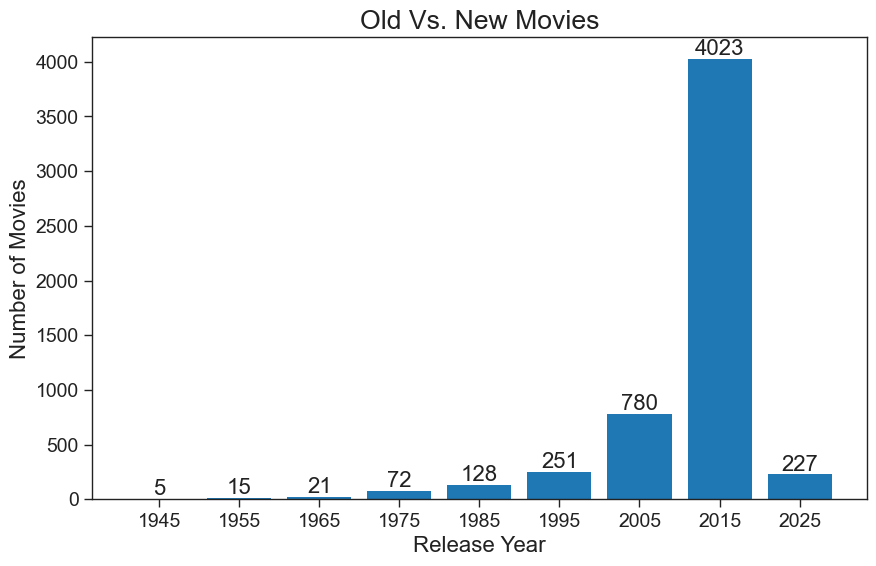

In [28]:
#make a bar graph out of it
years = list(dict_year_numMovies_compact.keys())
num = list(dict_year_numMovies_compact.values())
# Creating the bar graph

print(years)
print(num)
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
#plt.bar(keys, values)

bars = plt.bar(years, num, width = 0.8)

#plt.xticks(range(len(years)), years) 

# Adding labels and title
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Old Vs. New Movies')

# Adding labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Display the graph
plt.show()

***

#### Duration Vs Release Year

[91, 125, 104, 127, 91, 94, 161, 61, 166, 147, 103, 97, 106, 111, 110, 105, 96, 124, 116, 98, 91, 115, 122, 99, 99, 88, 100, 102, 93, 96, 95, 85, 97, 95, 83, 103, 113, 13, 182, 106, 48, 145, 145, 93, 106, 147, 87, 96, 95, 91, 90, 97, 117, 128, 90, 119, 110, 143, 119, 114, 106, 99, 118, 115, 95, 115, 108, 63, 117, 121, 142, 113, 154, 95, 108, 120, 100, 82, 124, 114, 104, 94, 94, 93, 97, 109, 88, 101, 105, 102, 101, 103, 106, 118, 86, 121, 229, 76, 95, 98, 89, 120, 110, 83, 121, 105, 94, 156, 112, 95, 107, 114, 129, 97, 125, 107, 127, 128, 92, 135, 124, 136, 165, 124, 136, 150, 112, 119, 133, 142, 93, 113, 124, 116, 106, 145, 93, 95, 108, 90, 92, 122, 122, 122, 122, 84, 96, 115, 110, 88, 102, 91, 105, 135, 140, 133, 92, 82, 97, 94, 121, 97, 110, 64, 59, 101, 127, 114, 108, 98, 86, 139, 111, 115, 102, 100, 135, 95, 97, 124, 118, 115, 115, 104, 106, 97, 87, 88, 114, 90, 142, 90, 105, 103, 116, 113, 99, 96, 148, 189, 97, 102, 99, 85, 112, 91, 91, 141, 130, 98, 105, 101, 105, 118, 97, 102, 1

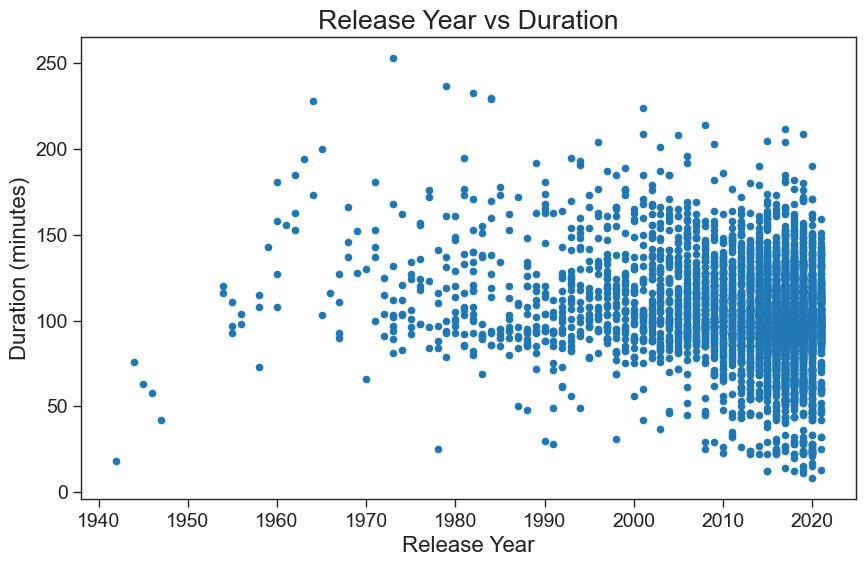

In [29]:
##Making the scater plot 
#Data: released years, TV rating, duration of movies

#all_duration
#all_years
#all_tv_rating
#unique_rating --> 15
#unique_years --> 72
#make the scatter plot

#since the order of the data matters, will use the dictonary to preserve the order
    #get the ordered release years
    #get the ordered movie durations
    #get the ordered rating
#from the dict dict_rating_year_duration
#dict_duration_year:  {0: ['PG', '2021', '91'], 1: ['TV-MA', '1993', '125'],
# Extract release years and durations
release_years = [int(data[1]) for data in dict_rating_year_duration.values()]
durations = [int(data[2]) for data in dict_rating_year_duration.values()]

#####################################################
plt.figure(figsize=(10, 6))

plt.scatter(release_years, durations, s=20)  # Adjust the size of markers if needed

##average duration
print(durations)
print("Average (mean) duration : ", sum(durations)/len(durations), "minutes")



# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.title('Release Year vs Duration')

# Show plot
plt.show()




#### PG rating Vs Release Year

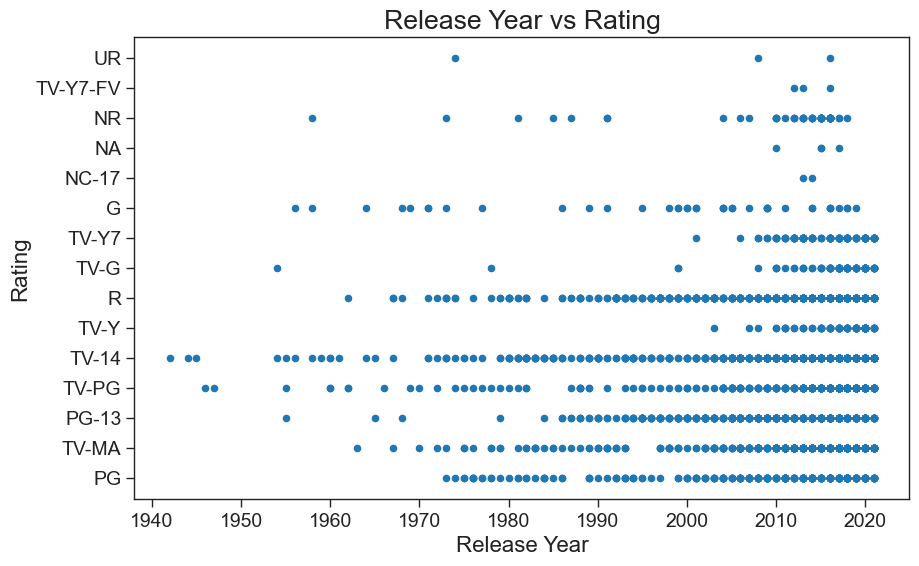

In [30]:
##Making the scater plot 
#Data: released years, TV rating, duration of movies

#all_duration
#all_years
#all_tv_rating
#unique_rating --> 15
#unique_years --> 72
#make the scatter plot

#since the order of the data matters, will use the dictonary to preserve the order
    #get the ordered release years
    #get the ordered movie durations
    #get the ordered rating
#from the dict dict_rating_year_duration
#dict_duration_year:  {0: ['PG', '2021', '91'], 1: ['TV-MA', '1993', '125'],
# Extract release years and rating
release_years = [int(data[1]) for data in dict_rating_year_duration.values()]
rating = [(data[0]) for data in dict_rating_year_duration.values()]

#####################################################
plt.figure(figsize=(10, 6))

plt.scatter(release_years, rating, s=20)  # Adjust the size of markers if needed


# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.title('Release Year vs Rating')

# Show plot
plt.show()

#### PG rating Vs Duration

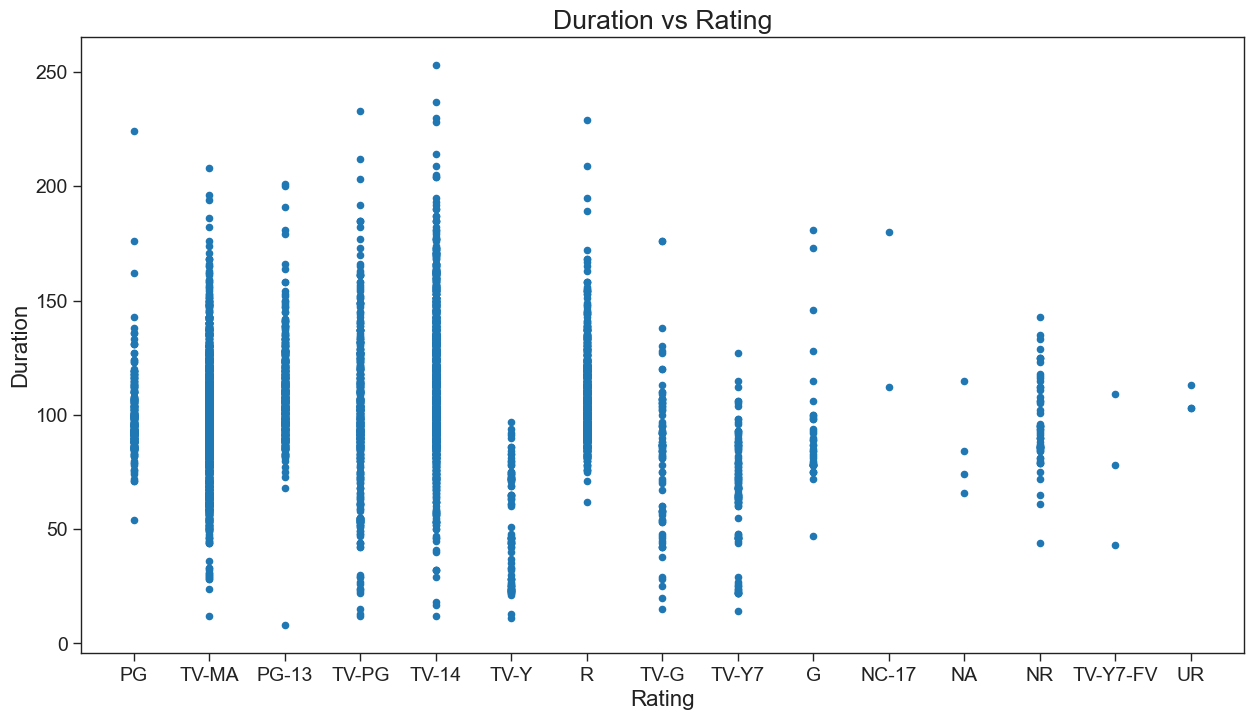

In [31]:
##Making the scater plot 
#Data: released years, TV rating, duration of movies

#all_duration
#all_years
#all_tv_rating
#unique_rating --> 15
#unique_years --> 72
#make the scatter plot

#since the order of the data matters, will use the dictonary to preserve the order
    #get the ordered release years
    #get the ordered movie durations
    #get the ordered rating
#from the dict dict_rating_year_duration
#dict_duration_year:  {0: ['PG', '2021', '91'], 1: ['TV-MA', '1993', '125'],
# Extract release years and rating
duration = [int(data[2]) for data in dict_rating_year_duration.values()]
rating = [(data[0]) for data in dict_rating_year_duration.values()]

#####################################################
plt.figure(figsize=(15, 8))

plt.scatter(rating, duration, s=20)  # Adjust the size of markers if needed


# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Duration')
plt.title('Duration vs Rating')

# Show plot
plt.show()

### Duration Box Plot

all_duration  ['91', '125', '104', '127', '91', '94', '161', '61', '166', '147', '103', '97', '106', '111', '110', '105', '96', '124', '116', '98', '91', '115', '122', '99', '99', '88', '100', '102', '93', '96', '95', '85', '97', '95', '83', '103', '113', '13', '182', '106', '48', '145', '145', '93', '106', '147', '87', '96', '95', '91', '90', '97', '117', '128', '90', '119', '110', '143', '119', '114', '106', '99', '118', '115', '95', '115', '108', '63', '117', '121', '142', '113', '154', '95', '108', '120', '100', '82', '124', '114', '104', '94', '94', '93', '97', '109', '88', '101', '105', '102', '101', '103', '106', '118', '86', '121', '229', '76', '95', '98', '89', '120', '110', '83', '121', '105', '94', '156', '112', '95', '107', '114', '129', '97', '125', '107', '127', '128', '92', '135', '124', '136', '165', '124', '136', '150', '112', '119', '133', '142', '93', '113', '124', '116', '106', '145', '93', '95', '108', '90', '92', '122', '122', '122', '122', '84', '96', '115', '110

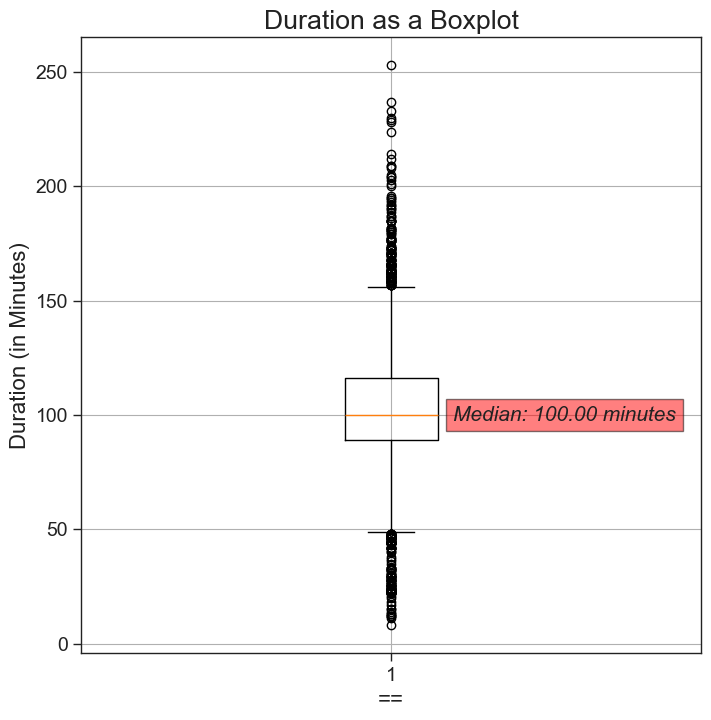

In [56]:
#make a box plot for the duration values to find and outliers
#all_duration
print("all_duration ", all_duration)
all_duration_int = []
for duration in all_duration:
    all_duration_int.append(int(duration))
print("all_duration_int ", all_duration_int)

# Create a boxplot
plt.figure(figsize=(8, 8))
plt.boxplot(all_duration_int)
plt.title('Duration as a Boxplot')
plt.xlabel('==')
plt.ylabel('Duration (in Minutes)')
plt.grid(True)


# Get the median value
median = np.median(all_duration_int)

# Label the median value
#https://matplotlib.org/stable/users/explain/text/text_intro.html
plt.text(1.10, median, f'Median: {median:.2f} minutes', fontsize=15, verticalalignment='center',style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5})

plt.show()

***

#### Listed In

A movie is listed in multiple categories
first separate them and count how many unique categories there are, then see how to represent them

In [ ]:
dict_listed_in = {}
all_listed_in = []

#separate values based on ',' and then add to the list
for movie in json_data:
    listed_in = movie['listed_in']
    for genre in listed_in.split(', '):
        all_listed_in.append(genre)
        # if genre == 'Movies':
        #     print(movie['title'])

print(all_listed_in)


#unique listed_in
unique_listed_in = []
for genre in all_listed_in:
    if genre in unique_listed_in:
        continue
    else:
        unique_listed_in.append(genre)

print("unique_listed_in: ",unique_listed_in)
print("# unique_listed_in: ",len(unique_listed_in))


#fill up the dict
for genre in unique_listed_in:
    dict_listed_in[genre] = 0
print("dict_listed_in  ", dict_listed_in)

for genre in all_listed_in:
    dict_listed_in[genre] = dict_listed_in[genre] + 1

print("dict_listed_in  ", dict_listed_in)




['Children & Family Movies', 'Dramas', 'Independent Movies', 'International Movies', 'Comedies', 'Dramas', 'Dramas', 'International Movies', 'Children & Family Movies', 'Comedies', 'Thrillers', 'Comedies', 'International Movies', 'Children & Family Movies', 'Comedies', 'International Movies', 'Romantic Movies', 'Comedies', 'International Movies', 'Music & Musicals', 'Comedies', 'Horror Movies', 'Sci-Fi & Fantasy', 'Thrillers', 'Dramas', 'Independent Movies', 'International Movies', 'Dramas', 'International Movies', 'Thrillers', 'Action & Adventure', 'Dramas', 'International Movies', 'Action & Adventure', 'Dramas', 'Action & Adventure', 'Classic Movies', 'Dramas', 'Dramas', 'Horror Movies', 'Thrillers', 'Action & Adventure', 'Horror Movies', 'Thrillers', 'Action & Adventure', 'Horror Movies', 'Thrillers', 'Action & Adventure', 'Dramas', 'Thrillers', 'Action & Adventure', 'Anime Features', 'International Movies', 'Action & Adventure', 'Anime Features', 'International Movies', 'Action & A

['Children & Family Movies', 'Dramas', 'Independent Movies', 'International Movies', 'Comedies', 'Thrillers', 'Romantic Movies', 'Music & Musicals', 'Horror Movies', 'Sci-Fi & Fantasy', 'Action & Adventure', 'Classic Movies', 'Anime Features', 'Documentaries', 'Sports Movies', 'Cult Movies', 'Faith & Spirituality', 'LGBTQ Movies', 'Stand-Up Comedy', 'Movies']
[583, 2398, 751, 2548, 1636, 575, 604, 328, 352, 237, 848, 109, 68, 418, 163, 70, 60, 83, 318, 30]


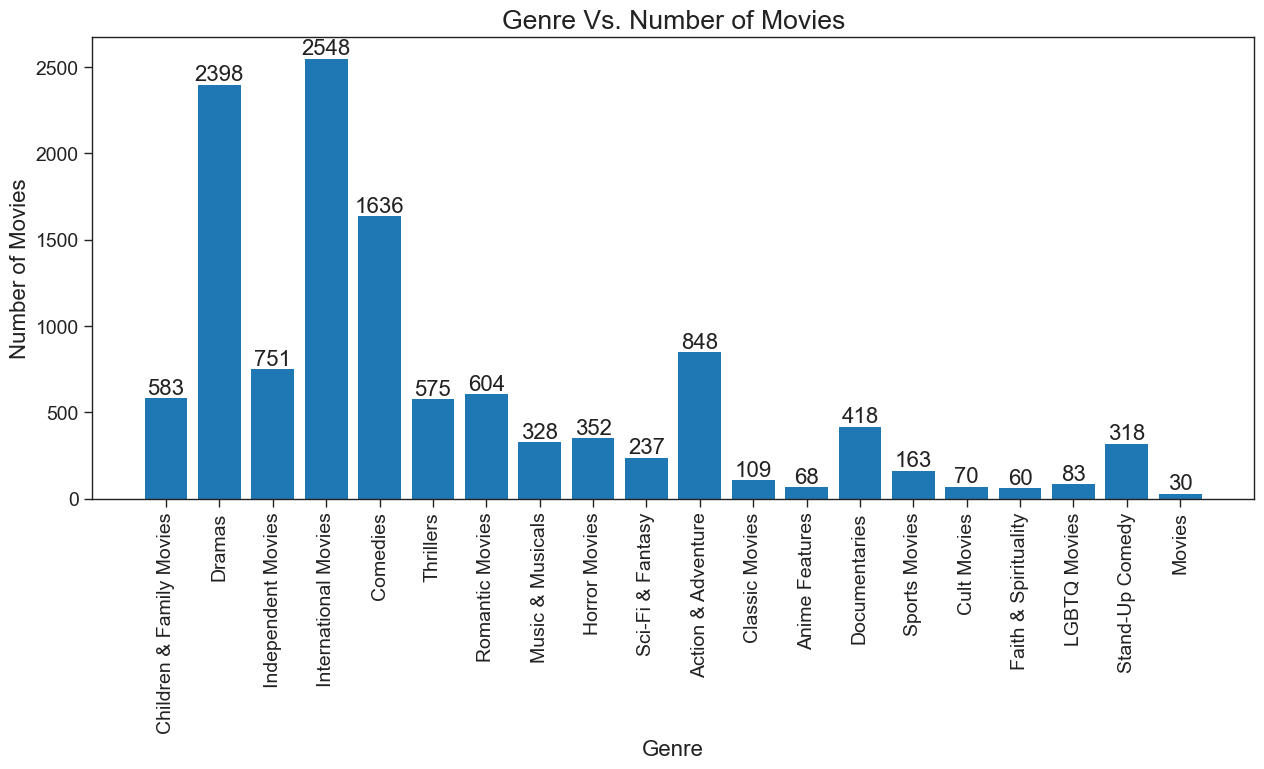

In [ ]:

#https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels
#make a bar graph out of it
genre = list(dict_listed_in.keys())
num = list(dict_listed_in.values())
# Creating the bar graph

print(genre)
print(num)
plt.figure(figsize=(15, 6))  # Adjust figure size as needed
#plt.bar(keys, values)

bars = plt.bar(genre, num, width = 0.8)

#plt.xticks(range(len(years)), years) 
plt.xticks(rotation=90)
# Adding labels and title
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Genre Vs. Number of Movies')

# Adding labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Display the graph
plt.show()

***

***

In [ ]:
for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
    print("Node {0}\t\t\t: {1}".format(node, data))  

Node My Little Pony: A New Generation			: {'type': 'movie', 'label': 'My Little Pony: A New Generation'}
Node Robert Cullen			: {'type': 'director', 'label': 'Robert Cullen'}
Node José Luis Ucha			: {'type': 'director', 'label': 'José Luis Ucha'}
Node Vanessa Hudgens			: {'type': 'cast', 'label': 'Vanessa Hudgens'}
Node Kimiko Glenn			: {'type': 'cast', 'label': 'Kimiko Glenn'}
Node James Marsden			: {'type': 'cast', 'label': 'James Marsden'}
Node Sofia Carson			: {'type': 'cast', 'label': 'Sofia Carson'}
Node Liza Koshy			: {'type': 'cast', 'label': 'Liza Koshy'}
Node Ken Jeong			: {'type': 'cast', 'label': 'Ken Jeong'}
Node Elizabeth Perkins			: {'type': 'cast', 'label': 'Elizabeth Perkins'}
Node Jane Krakowski			: {'type': 'cast', 'label': 'Jane Krakowski'}
Node Michael McKean			: {'type': 'cast', 'label': 'Michael McKean'}
Node Phil LaMarr			: {'type': 'cast', 'label': 'Phil LaMarr'}
Node Sankofa			: {'type': 'movie', 'label': 'Sankofa'}
Node Haile Gerima			: {'type': 'director', '

In [ ]:
print("Degree sequence --> ")
print([netflix_graph.degree(node) for node in netflix_graph])


# all nodes (returns a dictionary with node : degree pairs for all nodes)

print(netflix_graph.degree("My Little Pony: A New Generation"))
print(netflix_graph.degree("Robert Cullen"))

for node, data in netflix_graph.nodes(data=True): # data=True includes node attributes as dictionaries
     if node == "My Little Pony: A New Generation" :
        print("Node {0}\t\t\t: {1}".format(node, data))

print("==============")
# To show the edge relation, we can use the following for loop.
for n1, n2, data in netflix_graph.edges(data=True):
    if node == "My Little Pony: A New Generation" :
        print("{0} <----> {1}: {2}".format(n1, n2, data))
#in this we are showing the edge between nodes and its edge attribute (like edge weight, edge distance) if exists.
        
print(netflix_graph.has_edge("My Little Pony: A New Generation", "Robert Cullen"))


Degree sequence --> 
[12, 1, 1, 7, 3, 12, 3, 2, 11, 4, 8, 3, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 12, 1, 4, 7, 5, 5, 3, 3, 1, 2, 1, 10, 1, 12, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 11, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 11, 1, 5, 5, 2, 1, 1, 1, 3, 1, 1, 1, 7, 1, 2, 1, 1, 1, 13, 2, 6, 5, 5, 5, 5, 5, 1, 5, 1, 1, 9, 2, 7, 3, 3, 6, 5, 5, 12, 4, 20, 10, 13, 6, 9, 12, 10, 15, 7, 3, 1, 11, 3, 3, 4, 8, 2, 1, 1, 1, 1, 1, 1, 11, 6, 3, 11, 11, 12, 4, 6, 1, 2, 5, 2, 10, 2, 4, 2, 5, 3, 2, 9, 2, 3, 1, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 1, 1, 2, 4, 3, 2, 1, 2, 2, 1, 3, 10, 1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 11, 11, 2, 1, 3, 2, 1, 2, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 11, 1, 12, 2, 1, 2, 2, 5, 1, 1, 1, 1, 9, 2, 1, 3, 2, 5, 2, 1, 5, 11, 1, 10, 13, 7, 13, 10, 2, 2, 11, 4, 2, 12, 5, 8, 4, 6, 5, 2, 7, 3, 6, 3, 7, 11, 7, 7, 8, 2, 7, 8, 7, 5, 3, 4, 1, 9, 5, 5, 3, 11, 2, 3, 2, 11, 1, 1, 11, 5, 9, 9, 6, 7, 3, 2, 3, 2, 2, 3, 12, 2, 3, 1, 1, 4, 3, 3, 2, 14, 2, 1, 1, 3, 2, 2, 22, 1, 1, 1, 5, 1, 1, 1, 5, 1, 2, 1, 2, 5, 1

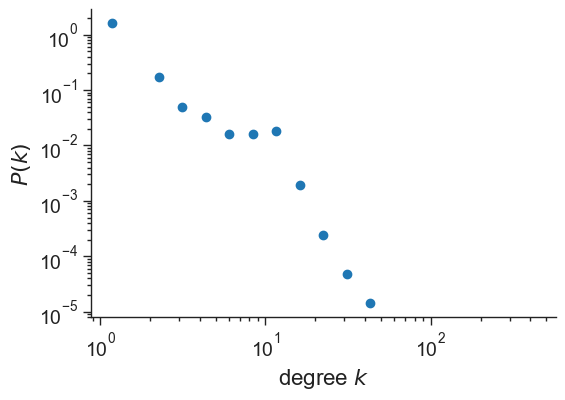

In [ ]:
# Let's plot the degree distribution, by calling the function defined above.
plot_degree_dist(netflix_graph)